In [2]:
# load datasets (students Portuguese scores)

import pandas as pd
d = pd.read_csv('Data/student-por.csv', sep=';')
d.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [3]:
d['pass'] = d.apply(lambda row: 1 if (row['G1'] + row['G2'] + row['G2']) >= 35 else 0, axis=1) # axis=1 means applying for row
d = d.drop(['G1', 'G2', 'G3'], axis=1) # Elimnar las columnas G1, G2 y G3
d.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,6,1
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,4,4,4,1,1,3,0,1
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,no,4,1,4,1,1,1,2,1
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,no,4,2,2,1,1,1,0,1
9,GP,M,15,U,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,1


In [4]:
d = pd.get_dummies(d, ['school', 'sex', 'address', 'famsize', 'Pstatus',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic'])
d.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [5]:
d = d.sample(frac=1)

In [6]:
d.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
615,17,3,2,2,2,0,1,2,3,1,...,1,0,0,1,0,1,1,0,0,1
165,15,3,3,2,3,0,4,2,1,2,...,0,1,0,1,0,1,0,1,0,1
347,17,4,4,2,3,0,5,3,4,1,...,0,1,0,1,0,1,0,1,1,0
581,18,1,2,2,2,2,4,3,3,1,...,1,0,0,1,0,1,1,0,1,0
134,17,2,2,1,1,0,3,4,4,1,...,1,0,0,1,0,1,0,1,0,1


In [7]:
d_train = d[:500] # separa la muestra para los primeros 500
d_test = d[500:] # separa la muestra para los finales 500

In [8]:
d_train_tss = d_train.drop(['pass'], axis=1)
d_train_pass = d_train['pass']

In [9]:
d_test_tss = d_test.drop(['pass'], axis=1)
d_test_pass = d_test['pass']

In [10]:
d_att = d.drop(['pass'], axis=1)
d_pass = d['pass']

In [11]:
import numpy as np
print('Pasaron %d del %d (%.2f%%)' % (np.sum(d_pass), len(d_pass), 100*float(np.sum(d_pass)/len(d_pass))))

Pasaron 316 del 649 (48.69%)


In [12]:
# Configurar un árbol de decisión

from sklearn import tree
t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
t = t.fit(d_train_tss, d_train_pass)

In [13]:
t.score(d_test_tss, d_test_pass)

0.6577181208053692

[Text(234.36, 199.32, 'X[5] <= 0.5\nentropy = 1.0\nsamples = 500\nvalue = [252, 248]'),
 Text(160.704, 163.07999999999998, 'X[50] <= 0.5\nentropy = 0.984\nsamples = 424\nvalue = [180, 244]'),
 Text(107.13600000000001, 126.83999999999999, 'X[10] <= 3.5\nentropy = 0.965\nsamples = 399\nvalue = [156, 243]'),
 Text(53.568000000000005, 90.6, 'X[13] <= 0.5\nentropy = 0.921\nsamples = 327\nvalue = [110, 217]'),
 Text(26.784000000000002, 54.359999999999985, 'X[11] <= 1.5\nentropy = 1.0\nsamples = 96\nvalue = [47, 49]'),
 Text(13.392000000000001, 18.119999999999976, 'entropy = 0.764\nsamples = 18\nvalue = [4, 14]'),
 Text(40.176, 18.119999999999976, 'entropy = 0.992\nsamples = 78\nvalue = [43, 35]'),
 Text(80.352, 54.359999999999985, 'X[12] <= 1.0\nentropy = 0.845\nsamples = 231\nvalue = [63, 168]'),
 Text(66.96000000000001, 18.119999999999976, 'entropy = 0.675\nsamples = 90\nvalue = [16, 74]'),
 Text(93.74400000000001, 18.119999999999976, 'entropy = 0.918\nsamples = 141\nvalue = [47, 94]'),
 T

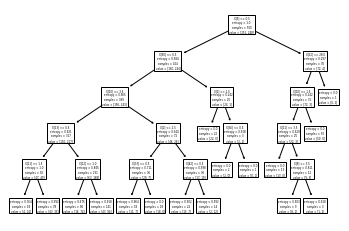

In [15]:
tree.plot_tree(t)